In [68]:
import planetary_computer
import adlfs
import xarray as xr


token = planetary_computer.sas.get_token("ai4edataeuwest", "imerg").token
fs = adlfs.AzureBlobFileSystem("ai4edataeuwest", credential=token)
store = fs.get_mapper("/imerg/gpm-imerg-hhr.zarr")
ds = xr.open_zarr(store, consolidated=True, use_cftime=True)

ds

<xarray.Dataset>
Dimensions:                         (time: 368160, lon: 3600, lat: 1800, latv: 2, lonv: 2, nv: 2)
Coordinates:
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    lat_bnds                        (lat, latv) float32 ...
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
    lon_bnds                        (lon, lonv) float32 ...
  * time                            (time) object 2000-06-01 00:00:00 ... 202...
    time_bnds                       (time, nv) object ...
Dimensions without coordinates: latv, lonv, nv
Data variables:
    HQobservationTime               (time, lon, lat) timedelta64[ns] ...
    HQprecipSource                  (time, lon, lat) float32 ...
    HQprecipitation                 (time, lon, lat) float32 ...
    IRkalmanFilterWeight            (time, lon, lat) float32 ...
    IRprecipitation                 (time, lon, lat) float32 ...
    precipitationCal                (time, lon, lat) float32 ...
    precipitationQualityIndex       (time, lon, lat) float32 ...
    precipitationUncal              (time, lon, lat) float32 ...
    probabilityLiquidPrecipitation  (time, lon, lat) float32 ...
    randomError                     (time, lon, lat) float32 ...
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

In [69]:
ir_precip_day = ds.isel(time=5000)["precipitationUncal"].transpose('lat', 'lon').compute()
ir_precip_day

<xarray.DataArray 'precipitationUncal' (lat: 1800, lon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
    time     object 2000-09-13 04:00:00
Attributes:
    CodeMissingValue:  -9999.9
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr

In [74]:
import matplotlib.pyplot as plt
import matplotlib.animation
import cartopy.crs as ccrs

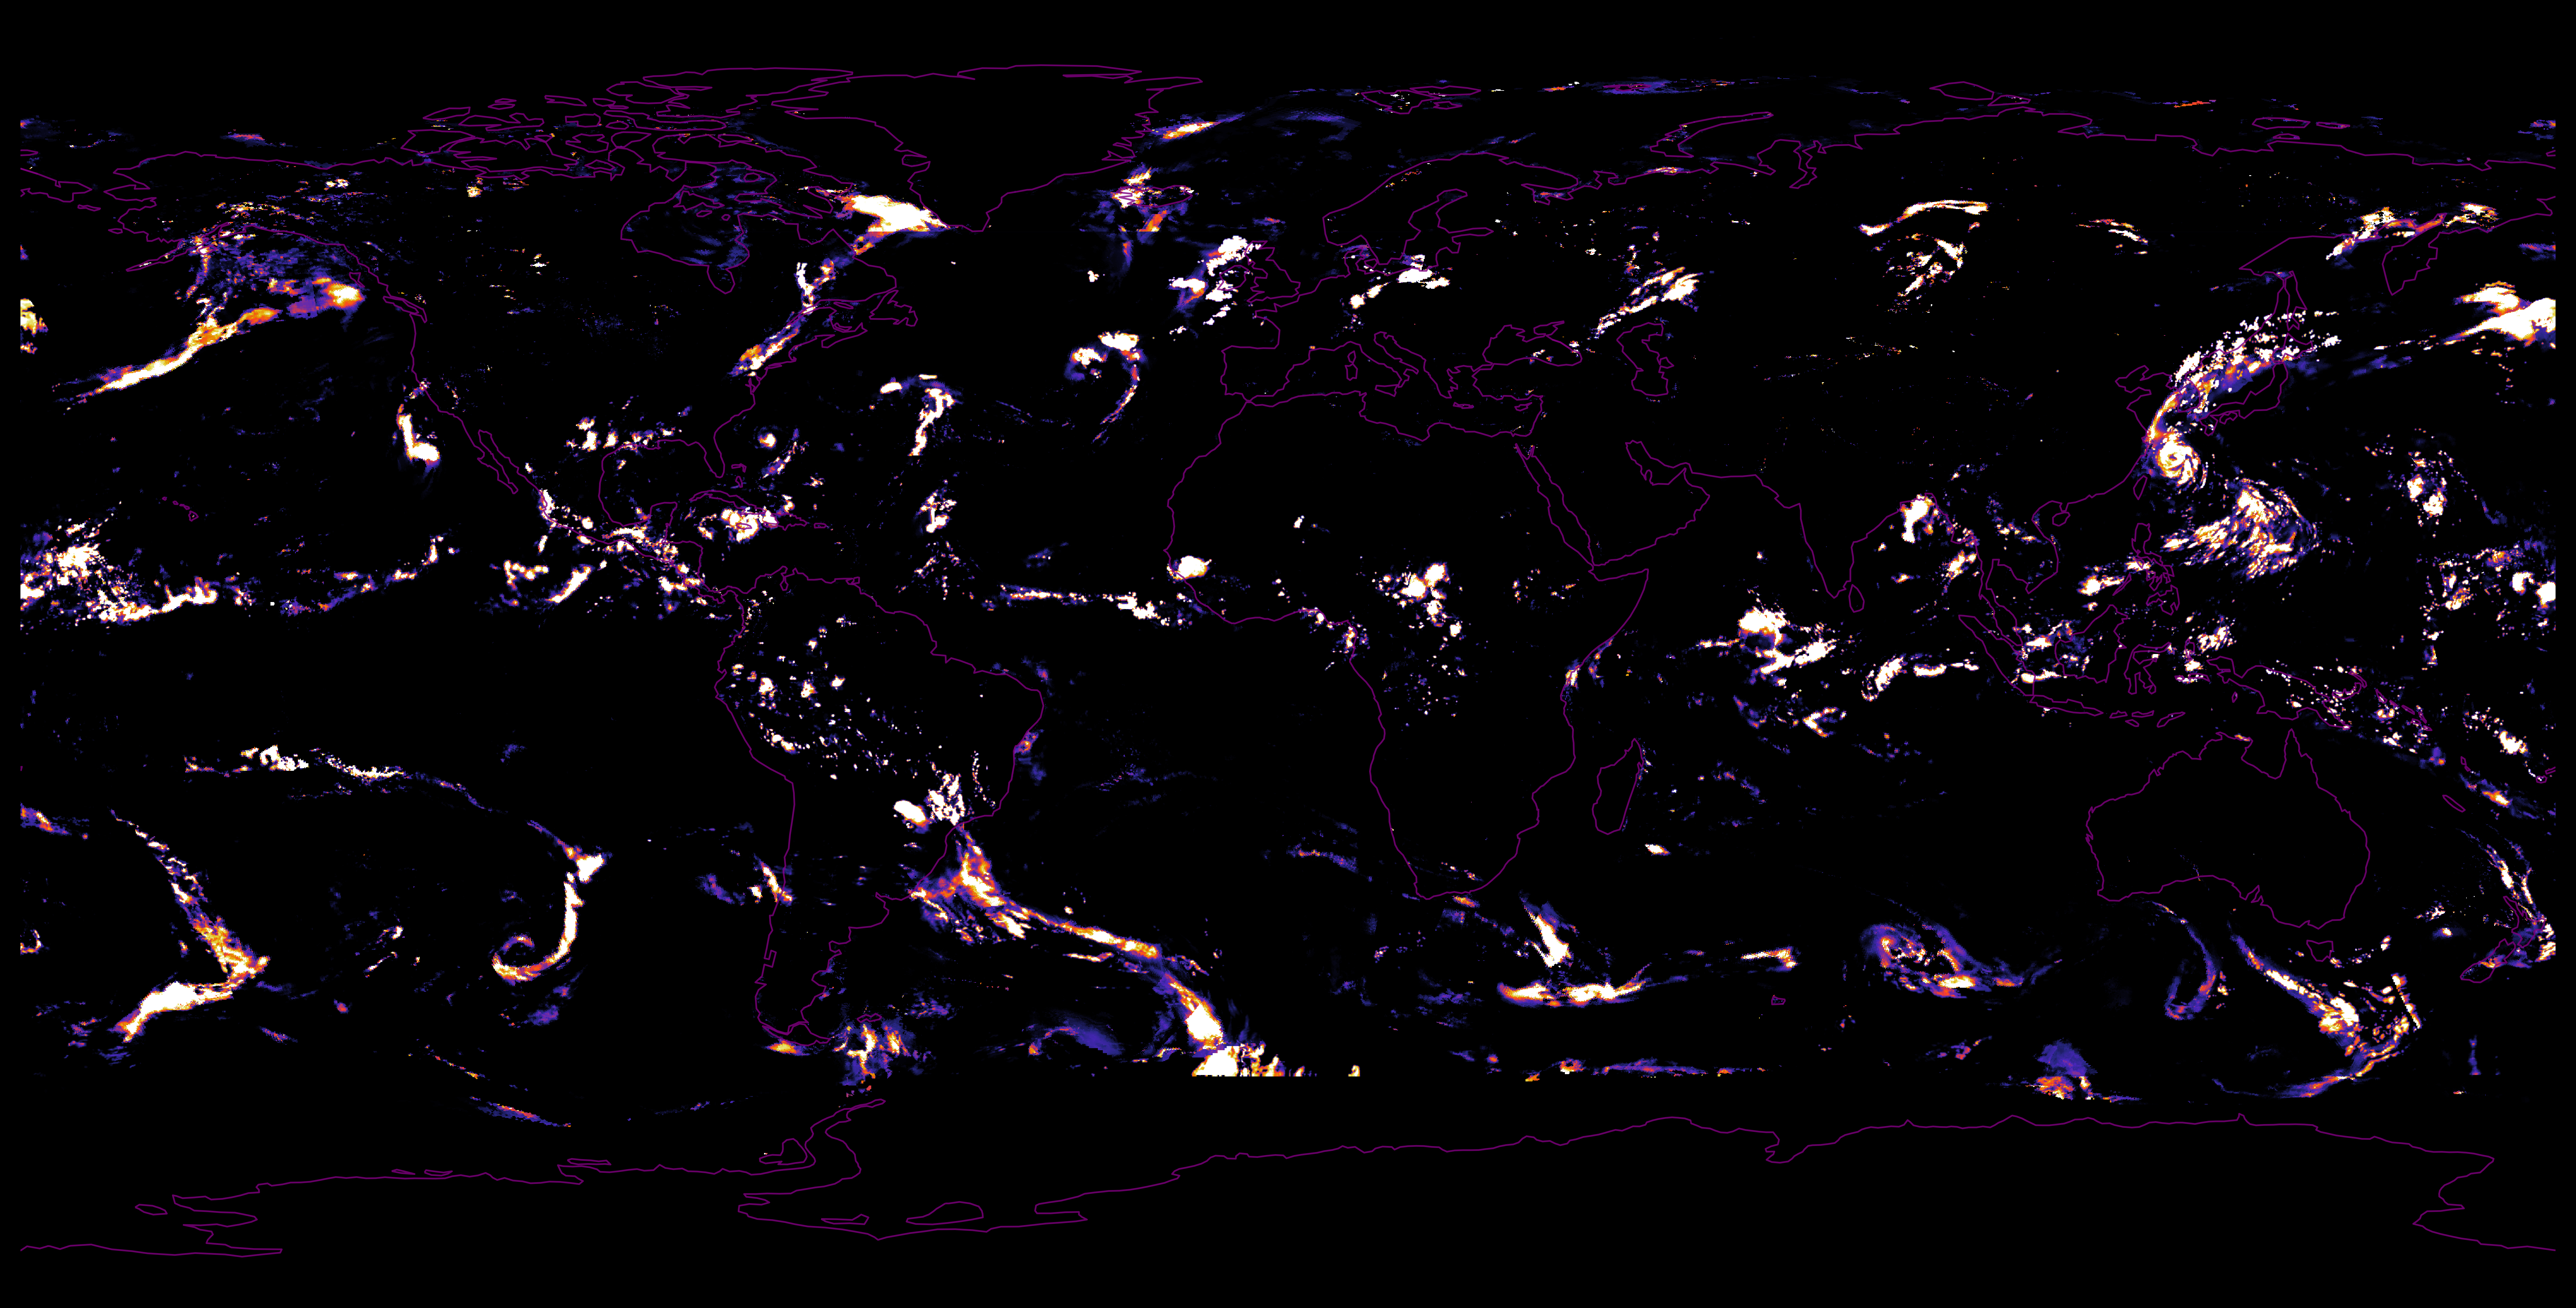

In [75]:
plt.style.use('dark_background')
w = 720
h = 405

fig = plt.figure(figsize=(16, 9), dpi=700)


ax = plt.axes(projection=ccrs.PlateCarree())
im = ir_precip_day.plot(ax=ax, add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree(), cmap="CMRmap", vmax=2,vmin=0 )
ax.coastlines(color='purple', alpha=0.8, linewidth=0.6)
ax.set_axis_off()
fig.savefig("../images/gpm-imerg-hhr-thumbnail.png")